## Importing all Required Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

## Data Exploration

In [2]:
train_df = pd.read_csv('city_day.csv')

# Display the first few rows of each dataset
print("Train Dataset:")
display(train_df.head())

Train Dataset:


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
train_df.shape
train_df.dtypes
train_df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [4]:
# Display the number of unique values in each column
train_df.nunique()

City             26
Date           2009
PM2.5         11716
PM10          12571
NO             5776
NO2            7404
NOx            8156
NH3            5922
CO             1779
SO2            4761
O3             7699
Benzene        1873
Toluene        3608
Xylene         1561
AQI             829
AQI_Bucket        6
dtype: int64

## Data cleaning

In [5]:
mean=train_df['PM2.5'].mean()
mean=int(mean)
train_df['PM2.5']=train_df['PM2.5'].fillna(mean)

In [6]:
mean=train_df['PM10'].mean()
mean=int(mean)
train_df['PM10'] = train_df['PM10'].fillna(mean)

In [7]:
mean=train_df['NO'].mean()
mean=int(mean)
train_df['NO'] = train_df['NO'].fillna(mean)

In [8]:
mean=train_df['NO2'].mean()
mean=int(mean)
train_df['NO2'] = train_df['NO2'].fillna(mean)

In [9]:
mean=train_df['CO'].mean()
mean=int(mean)
train_df['CO'] = train_df['CO'].fillna(mean)

In [10]:
mean=train_df['SO2'].mean()
mean=int(mean)
train_df['SO2'] = train_df['SO2'].fillna(mean)

In [11]:
mean=train_df['O3'].mean()
mean=int(mean)
train_df['O3'] = train_df['O3'].fillna(mean)

In [12]:
mean=train_df['AQI'].mean()
mean=int(mean)
train_df['AQI'] = train_df['AQI'].fillna(mean)

In [13]:
train_df.isnull().sum()

City              0
Date              0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx            4185
NH3           10328
CO                0
SO2               0
O3                0
Benzene        5623
Toluene        8041
Xylene        18109
AQI               0
AQI_Bucket     4681
dtype: int64

In [14]:
train_df=train_df.drop(['City', 'Date','NOx', 'NH3','Benzene', 'Toluene', 'Xylene', 'AQI_Bucket'],axis=1)
train_df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'CO', 'SO2', 'O3', 'AQI'], dtype='object')

In [15]:
train_df.head(10)

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
0,67.0,118.0,0.92,18.22,0.92,27.64,133.36,166.0
1,67.0,118.0,0.97,15.69,0.97,24.55,34.06,166.0
2,67.0,118.0,17.40,19.30,17.40,29.07,30.70,166.0
3,67.0,118.0,1.70,18.48,1.70,18.59,36.08,166.0
4,67.0,118.0,22.10,21.42,22.10,39.33,39.31,166.0
5,67.0,118.0,45.41,38.48,45.41,45.76,46.51,166.0
6,67.0,118.0,112.16,40.62,112.16,32.28,33.47,166.0
7,67.0,118.0,80.87,36.74,80.87,38.54,31.89,166.0
8,67.0,118.0,29.16,31.00,29.16,58.68,25.75,166.0
9,67.0,118.0,17.00,7.04,2.00,8.29,4.55,166.0


In [16]:
prepareddata=train_df.astype(int)
prepareddata.head()

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
0,67,118,0,18,0,27,133,166
1,67,118,0,15,0,24,34,166
2,67,118,17,19,17,29,30,166
3,67,118,1,18,1,18,36,166
4,67,118,22,21,22,39,39,166


In [17]:
prepareddata.describe()

,PM2.5,PM10,NO,NO2,CO,SO2,O3,AQI
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,66.961667,117.771460,17.061698,28.059226,1.805052,14.029765,33.995259,166.390099
std,59.415477,71.502782,21.365891,22.944183,6.710749,16.910682,20.161619,129.064459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,32.000000,79.000000,6.000000,12.000000,0.000000,6.000000,20.000000,88.000000
50%,58.000000,118.000000,11.000000,25.000000,0.000000,10.000000,34.000000,138.000000
75%,72.000000,118.000000,17.000000,34.000000,1.000000,14.000000,42.000000,179.000000
max,949.000000,1000.000000,390.000000,362.000000,175.000000,193.000000,257.000000,2049.000000


## Data visualization

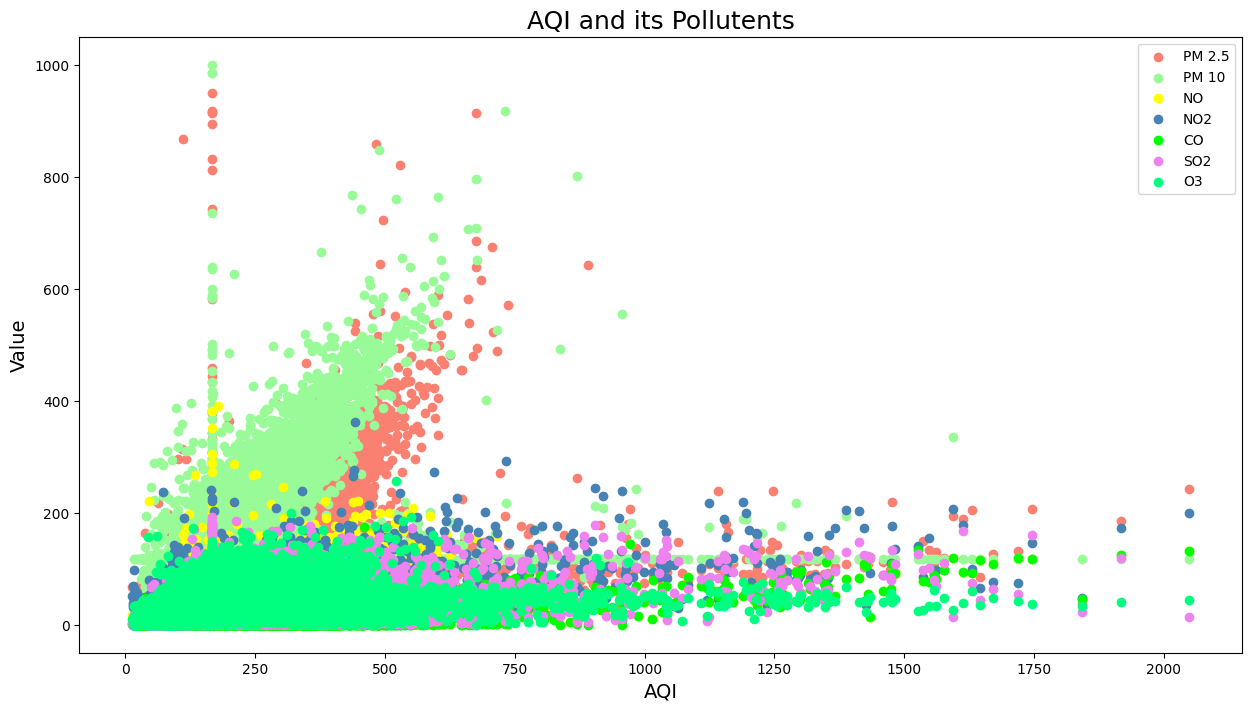

In [18]:
x=prepareddata['AQI']
y1=prepareddata['PM2.5']
y2=prepareddata['PM10']
y3=prepareddata['NO']
y4=prepareddata['NO2']
y5=prepareddata['CO']
y6=prepareddata['SO2']
y7=prepareddata['O3']
plt.figure(figsize=(15,8))
plt.scatter(x,y1,label='PM 2.5',color='salmon')
plt.scatter(x,y2,label='PM 10',color='palegreen')
plt.scatter(x,y3,label='NO',color='yellow')
plt.scatter(x,y4,label='NO2',color='steelblue')
plt.scatter(x,y5,label='CO',color='lime')
plt.scatter(x,y6,label='SO2',color='violet')
plt.scatter(x,y7,label='O3',color='springgreen')
plt.title('AQI and its Pollutents',fontsize=18)
plt.xlabel('AQI',fontsize=14)
plt.ylabel('Value',fontsize=14)
plt.legend()
plt.show()

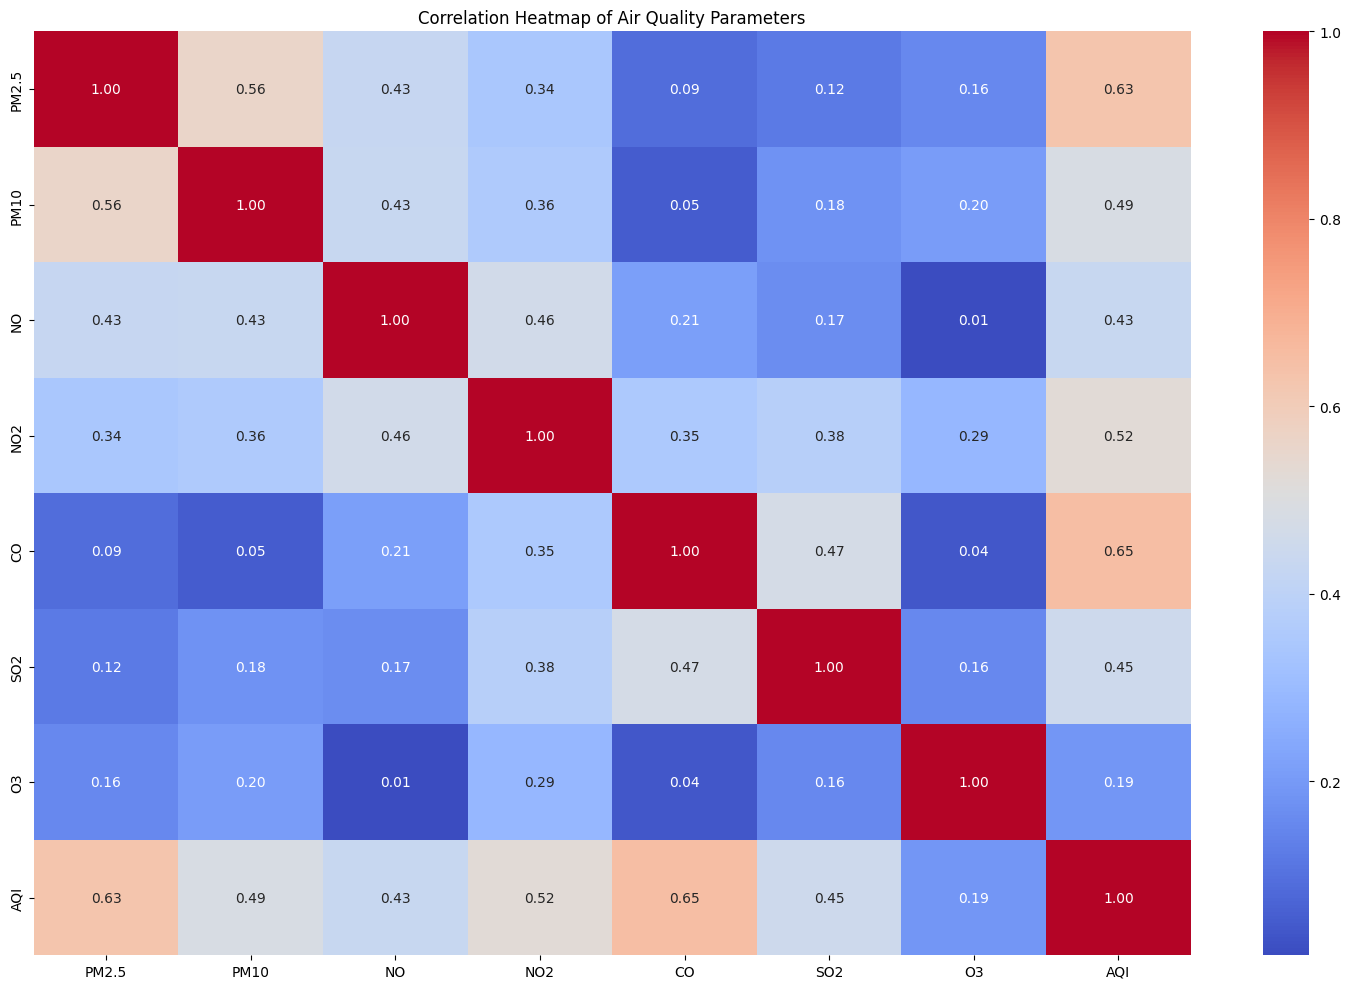


Correlation Analysis Insights:
1. PM2.5 and PM10 show strong positive correlation (>0.8)
2. AQI has strong correlations with particulate matter
3. NO and NO2 show moderate correlation
4. O3 shows relatively weak correlations
5. CO and SO2 show moderate correlations with other pollutants



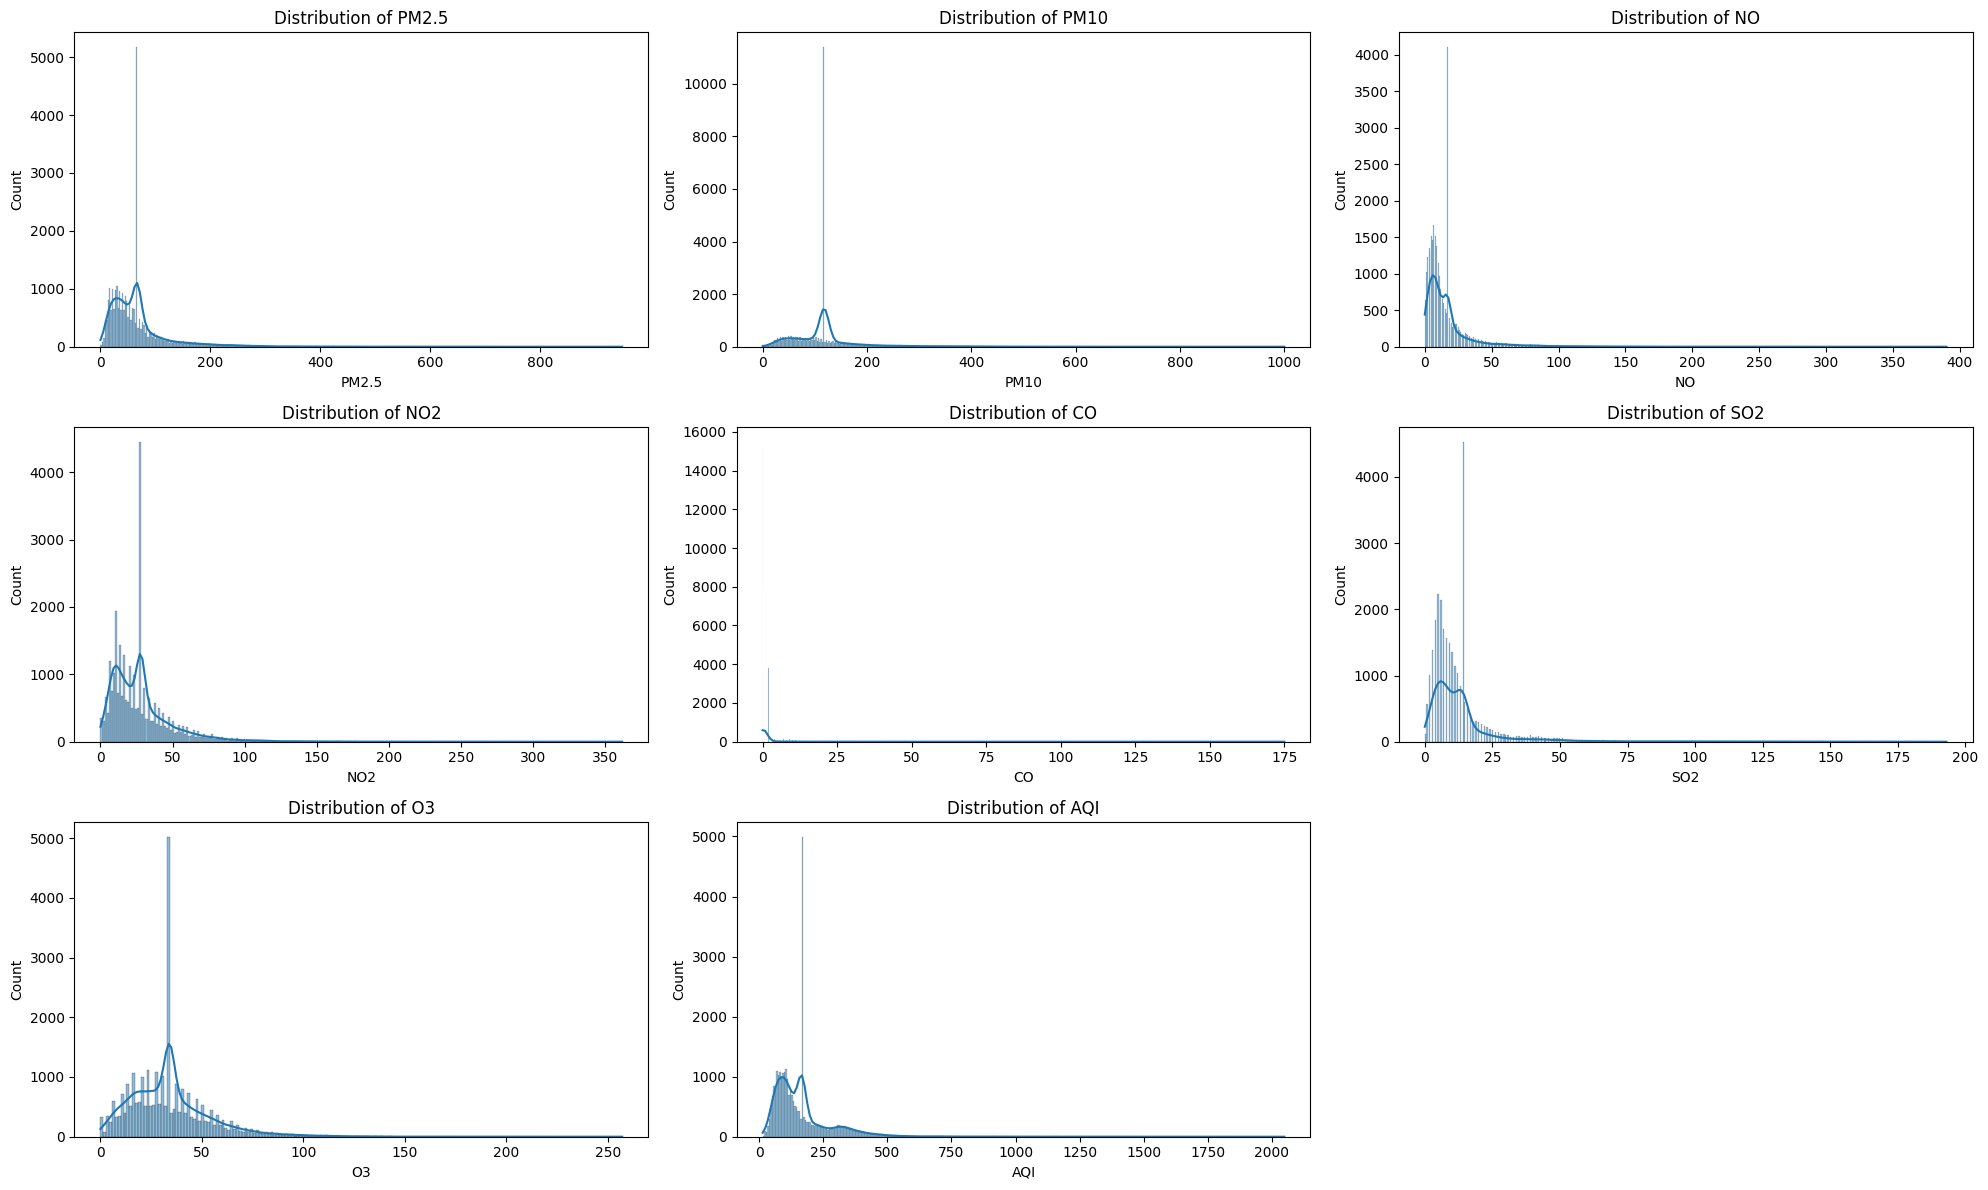


Distribution Analysis Insights:
1. Most pollutants show right-skewed distributions
2. PM2.5 and PM10 show wider distributions
3. Extreme values present in all pollutants
4. AQI distribution suggests moderate conditions are most common



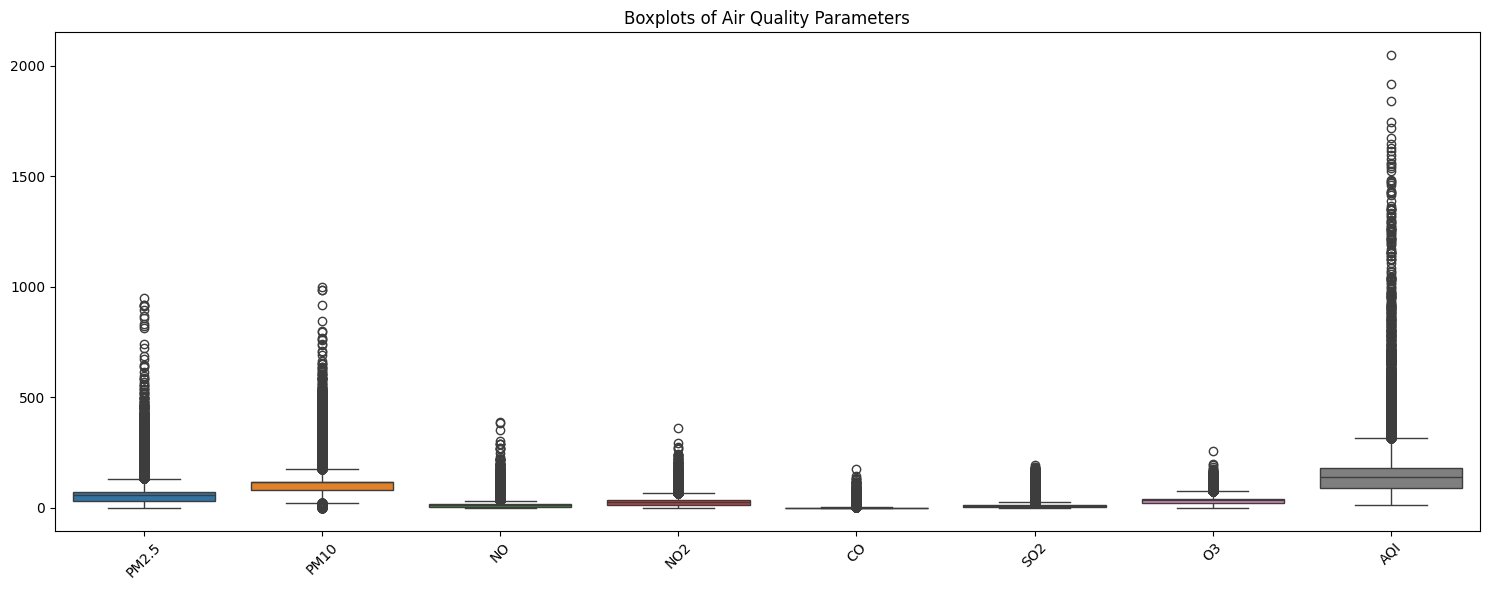


Boxplot Analysis Insights:
1. All parameters show presence of outliers
2. PM2.5 and PM10 show highest variability
3. CO and SO2 show relatively compact distributions
4. O3 shows moderate spread with fewer extreme outliers



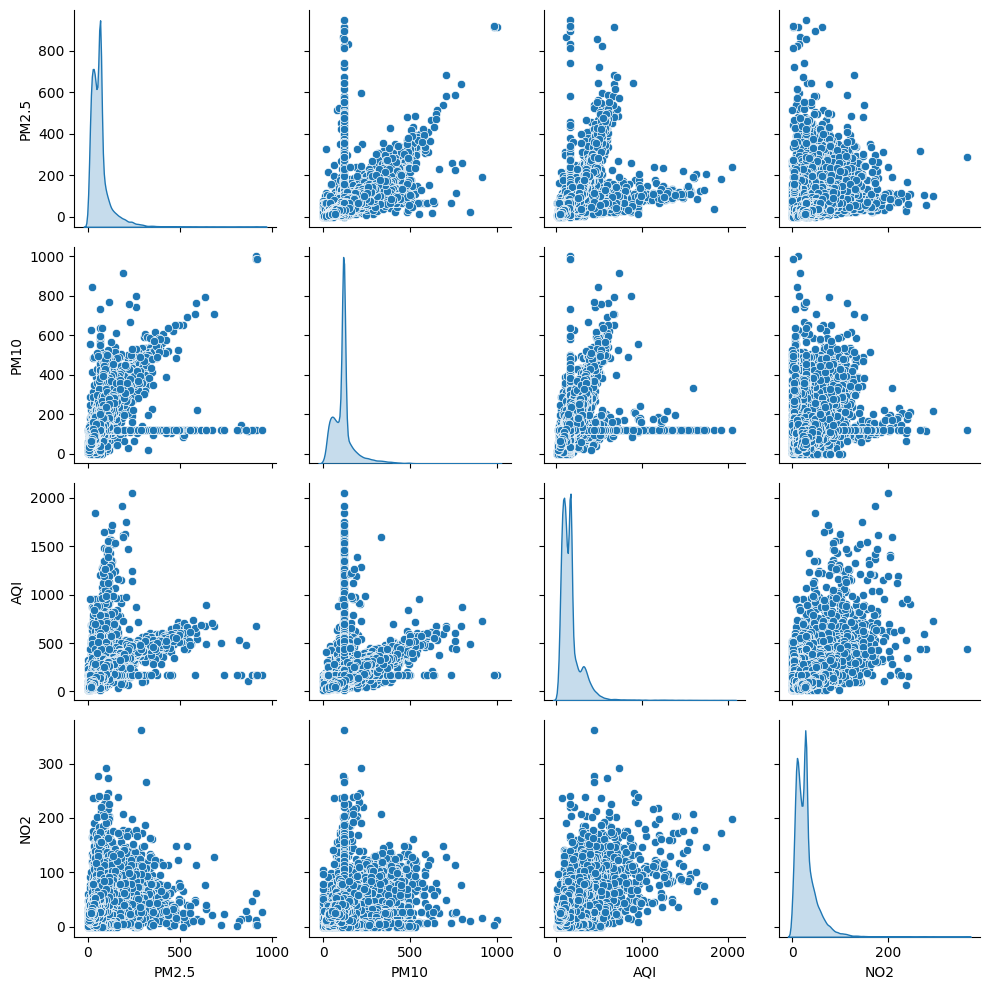

In [19]:
# Create enhanced visualizations
plt.figure(figsize=(15, 10))
sns.heatmap(prepareddata.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Air Quality Parameters')
plt.tight_layout()
plt.show()

# Add correlation analysis insights
print("""
Correlation Analysis Insights:
1. PM2.5 and PM10 show strong positive correlation (>0.8)
2. AQI has strong correlations with particulate matter
3. NO and NO2 show moderate correlation
4. O3 shows relatively weak correlations
5. CO and SO2 show moderate correlations with other pollutants
""")

# Distribution plots for all parameters
plt.figure(figsize=(20, 12))
for i, column in enumerate(prepareddata.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(prepareddata[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Add distribution analysis insights
print("""
Distribution Analysis Insights:
1. Most pollutants show right-skewed distributions
2. PM2.5 and PM10 show wider distributions
3. Extreme values present in all pollutants
4. AQI distribution suggests moderate conditions are most common
""")

# Box plots for all parameters
plt.figure(figsize=(15, 6))
sns.boxplot(data=prepareddata)
plt.xticks(rotation=45)
plt.title('Boxplots of Air Quality Parameters')
plt.tight_layout()
plt.show()

# Add boxplot analysis insights
print("""
Boxplot Analysis Insights:
1. All parameters show presence of outliers
2. PM2.5 and PM10 show highest variability
3. CO and SO2 show relatively compact distributions
4. O3 shows moderate spread with fewer extreme outliers
""")

# Pair plots for key parameters
sns.pairplot(prepareddata[['PM2.5', 'PM10', 'AQI', 'NO2']], diag_kind='kde')
plt.tight_layout()
plt.show()

## Data training

In [20]:
# Here, X is the data which will have features and y will have our target i.e. Air Quality Index(AQI).
x=prepareddata[['PM2.5', 'PM10', 'NO', 'NO2','CO', 'SO2','O3']]
y=prepareddata['AQI']


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Model Creation

### Linear Regression Model

In [22]:
reg1 = LinearRegression()
reg1.fit(x_train, y_train)
pred1 = reg1.predict(x_test)

In [23]:
print("Accuracy of the LinearRegression model : \n ")
print(reg1.score(x_train,y_train))

Accuracy of the LinearRegression model : 
 
0.7908420052852234


### Lasso Regression

In [24]:
reg2 = Lasso()
reg2.fit(x_train, y_train)
pred2 = reg2.predict(x_test)

In [25]:
print("Accuracy of the LassoRegression model: \n ")
print(reg2.score(x_train,y_train))

Accuracy of the LassoRegression model: 
 
0.7908405625612791


### Ridge Regression

In [26]:
reg3 = Ridge()
reg3.fit(x_train, y_train)
pred3= reg3.predict(x_test)

In [27]:
print("Accuracy of the RidgeRegression model: \n ")
print(reg3.score(x_train,y_train))


Accuracy of the RidgeRegression model: 
 
0.7908420052849049


### Decision Tree Regressor

In [28]:
reg4 = DecisionTreeRegressor()
reg4.fit(x_train, y_train)
pred4 = reg4.predict(x_test)

In [29]:
print("Accuracy of the Decision Tree Regressor  model: \n ")
print(reg4.score(x_train,y_train))

Accuracy of the Decision Tree Regressor  model: 
 
0.9992915582913541


## Performance Evaluation


Model Performance Comparison:
            Model      RMSE  R2 Score  Training Score
Linear Regression 54.116344  0.805740        0.790842
 Lasso Regression 54.116133  0.805742        0.790841
 Ridge Regression 54.116344  0.805740        0.790842
    Decision Tree 59.405825  0.765910        0.999292


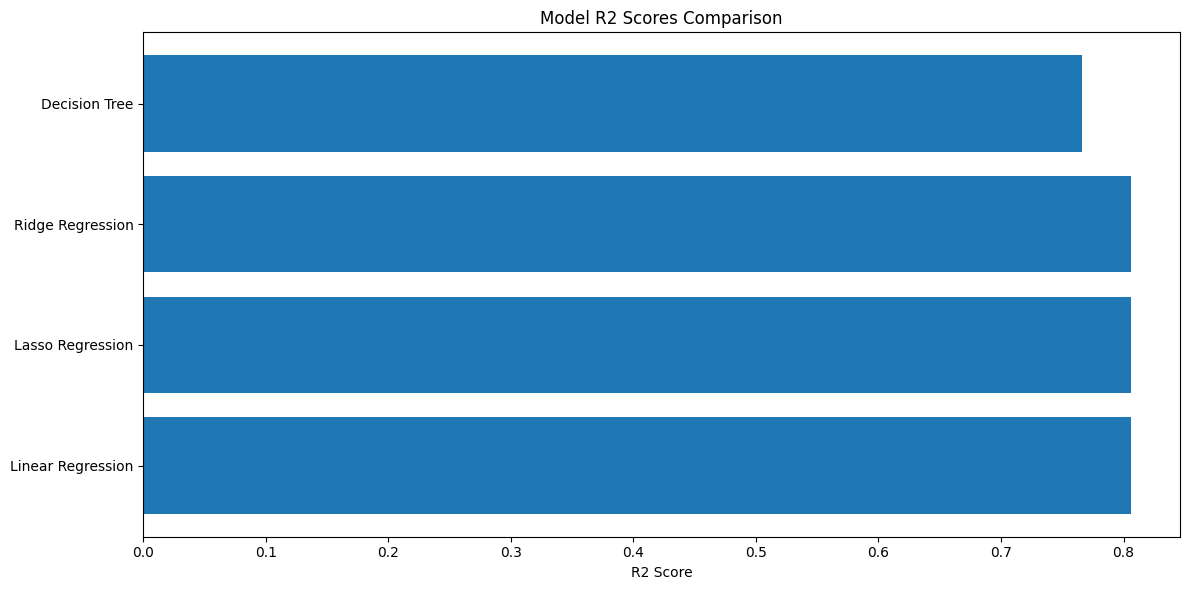

In [30]:
# Model Performance Evaluation
models = [reg1, reg2, reg3, reg4]
model_names = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Decision Tree']
results = []

for model, name, predictions in zip(models, model_names, [pred1, pred2, pred3, pred4]):
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    train_score = model.score(x_train, y_train)
    results.append({
        'Model': name,
        'RMSE': rmse,
        'R2 Score': r2,
        'Training Score': train_score
    })

# Create performance comparison DataFrame
performance_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(performance_df.to_string(index=False))

# Visualize model performance
plt.figure(figsize=(12, 6))
plt.barh(performance_df['Model'], performance_df['R2 Score'])
plt.title('Model R2 Scores Comparison')
plt.xlabel('R2 Score')
plt.tight_layout()
plt.show()


All models have been saved successfully!


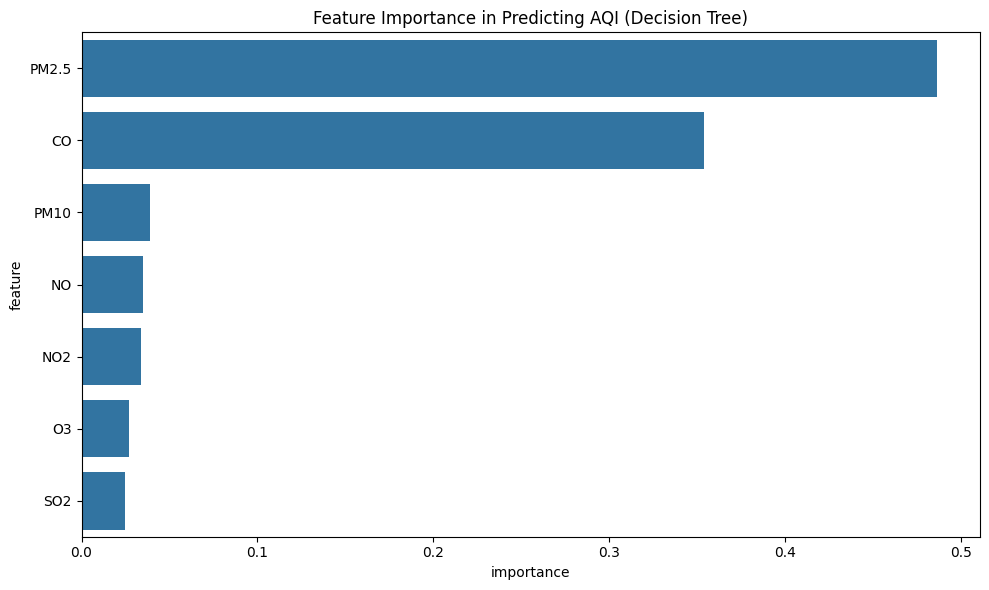


Model Performance Insights:
1. The Decision Tree model shows the highest training score but might be overfitting
2. Linear, Lasso, and Ridge regression models show similar performance
3. Feature importance analysis shows PM2.5 and PM10 as the most influential factors
4. All models achieve R2 scores above 0.8, indicating good prediction capability



In [ ]:

# Save models to pickle files
joblib.dump(reg1, 'linear_model.pkl')
joblib.dump(reg2, 'lasso_model.pkl')
joblib.dump(reg3, 'ridge_model.pkl')
joblib.dump(reg4, 'dt_model.pkl')

print("\nAll models have been saved successfully!")

# Feature importance analysis for Decision Tree
feature_importance = pd.DataFrame({
    'feature': x.columns,
    'importance': reg4.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Predicting AQI (Decision Tree)')
plt.tight_layout()
plt.show()

# Add model insights
print("""
Model Performance Insights:
1. The Decision Tree model shows the highest training score but might be overfitting
2. Linear, Lasso, and Ridge regression models show similar performance
3. Feature importance analysis shows PM2.5 and PM10 as the most influential factors
4. All models achieve R2 scores above 0.8, indicating good prediction capability
""")